## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Data Loading

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Cleaning

In [5]:
df = df.rename(columns={"satisfaction_level": "satisfaction",
                        "last_evaluation": "performance",
                        "average_montly_hours": "average_monthly_hours",
                        "time_spend_company": "tenure",
                        "Work_accident": "work_accident",
                        "Department": "department"})

In [6]:
df.duplicated().sum()

3008

In [7]:
df = df.drop_duplicates()

## Histograms and Boxplots

In [8]:
def histo_boxplot(col: str, **kwargs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), dpi=120)
    ax1.hist(df[col], edgecolor="black", **kwargs)
    ax2 = sns.boxplot(df[col], orient='h')
    ax1.set_title(f"Histogram of {col}")
    ax2.set_title(f"Boxplot of {col}")
    plt.show()

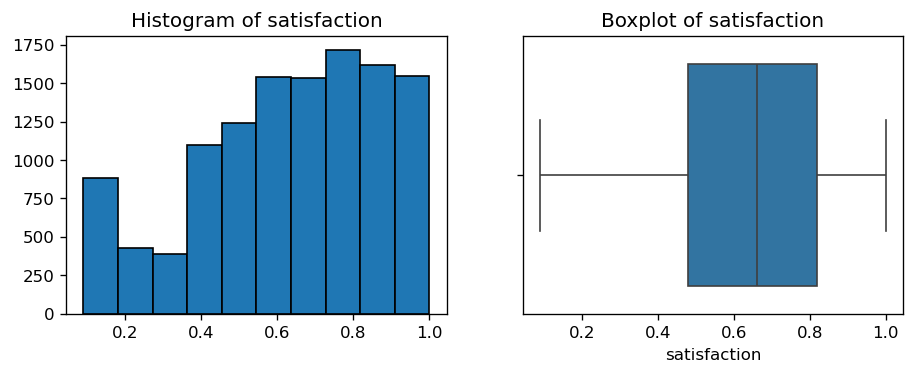

In [9]:
histo_boxplot("satisfaction")

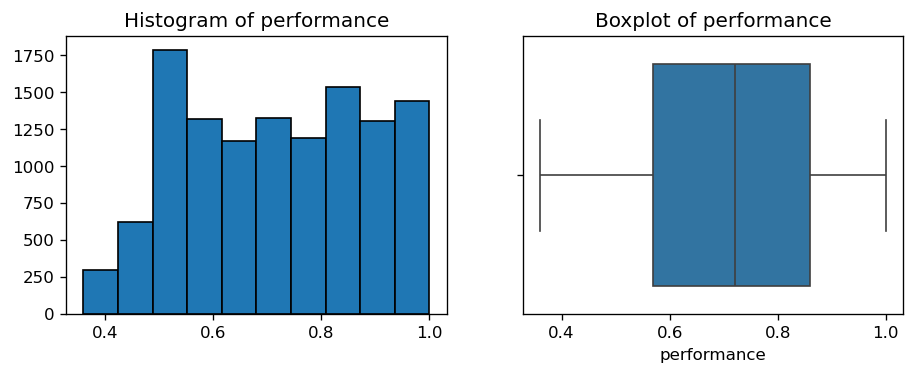

In [10]:
histo_boxplot("performance")

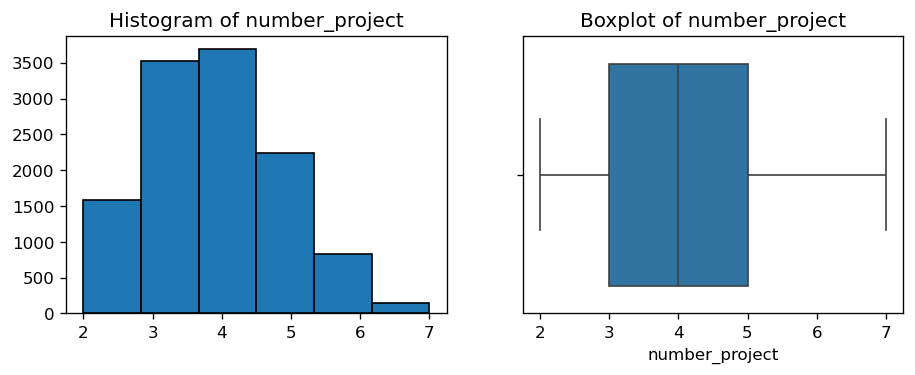

In [11]:
histo_boxplot("number_project", bins=6)

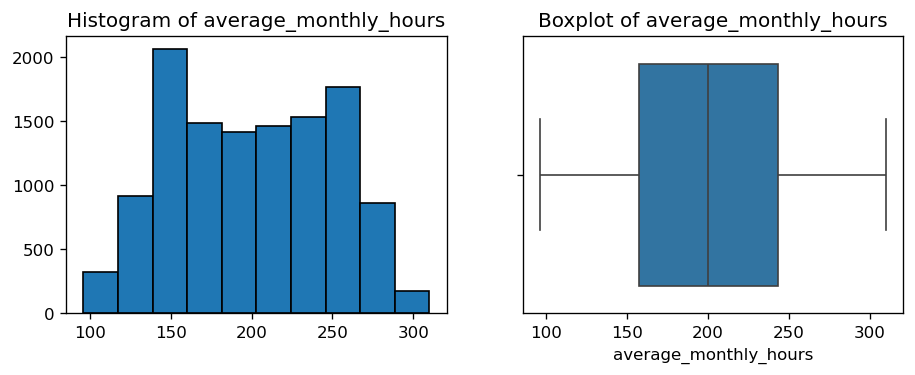

In [12]:
histo_boxplot("average_monthly_hours")

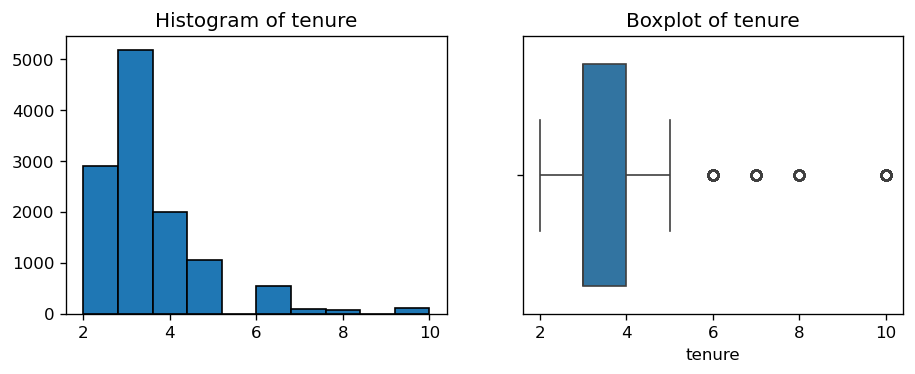

In [13]:
histo_boxplot("tenure")

## Summary Statistics

In [14]:
cols = ["satisfaction", "performance", "number_project",
        "average_monthly_hours", "tenure"]

df[cols].describe()

,satisfaction,performance,number_project,average_monthly_hours,tenure
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857
std,0.241070,0.168343,1.163238,48.727813,1.330240
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


## Outliers

In [15]:
def omit_outliers(col: str, remove: bool) -> pd.DataFrame:
    q1 = df["tenure"].quantile(0.25)
    q3 = df["tenure"].quantile(0.75)
    iqr = q3 - q1

    if remove:
        return df[(df[col] > q1 - 1.5 * iqr) & (df[col] < q3 + 1.5 * iqr)]
    else:
        return df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]

In [16]:
non_outlier_df = omit_outliers("tenure", True)
outlier_df = omit_outliers("tenure", False)

In [17]:
non_outlier_df[cols].describe()

,satisfaction,performance,number_project,average_monthly_hours,tenure
count,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000
mean,0.631944,0.715901,3.786066,200.144533,3.109161
std,0.239064,0.167595,1.164198,48.563047,0.899277
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.490000,0.570000,3.000000,157.000000,2.000000
50%,0.660000,0.720000,4.000000,199.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000


In [18]:
outlier_df[cols].describe()

,satisfaction,performance,number_project,average_monthly_hours,tenure
count,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.598677,0.727269,4.030340,204.932039,6.830097
std,0.264996,0.177934,1.126421,50.728714,1.377750
min,0.120000,0.360000,2.000000,97.000000,6.000000
25%,0.377500,0.580000,3.000000,163.000000,6.000000
50%,0.640000,0.745000,4.000000,214.000000,6.000000
75%,0.820000,0.880000,5.000000,248.000000,7.000000
max,1.000000,1.000000,6.000000,293.000000,10.000000


In [19]:
mean_1 = non_outlier_df[cols].describe().loc["mean"]
mean_2 = outlier_df[cols].describe().loc["mean"]

100 * (mean_2 / mean_1) - 100

satisfaction              -5.264221
performance                1.587942
number_project             6.451914
average_monthly_hours      2.392024
tenure                   119.676539
Name: mean, dtype: float64

In [20]:
std_1 = non_outlier_df[cols].describe().loc["std"]
std_2 = outlier_df[cols].describe().loc["std"]

100 * (std_2 / std_1) - 100

satisfaction             10.847264
performance               6.168960
number_project           -3.244922
average_monthly_hours     4.459495
tenure                   53.206376
Name: std, dtype: float64

## Visualizations

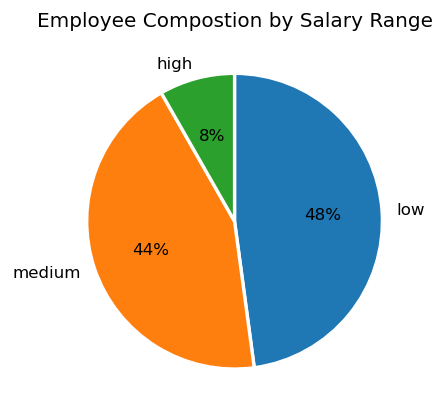

In [21]:
temp_df = df["salary"].value_counts()

fig, ax = plt.subplots(figsize=(4, 4), dpi=120)
ax.pie(temp_df, labels=temp_df.index, autopct="%1.0f%%", counterclock=False,
       startangle=90,
       wedgeprops={"edgecolor": "white", "linewidth": 2})
plt.title("Employee Compostion by Salary Range")
plt.show()

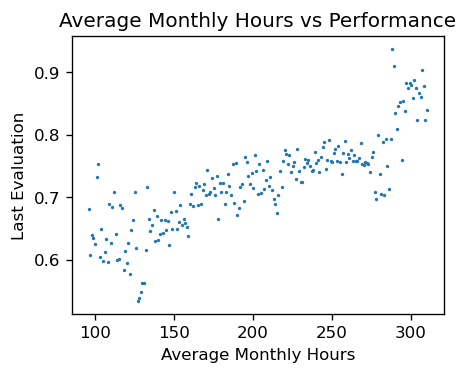

In [22]:
cols = ["average_monthly_hours", "performance"]
temp_df = df[cols].groupby("average_monthly_hours").mean().reset_index()

fig, ax = plt.subplots(figsize=(4, 3), dpi=120)
ax.scatter(temp_df["average_monthly_hours"], temp_df["performance"], s=1)
plt.xlabel("Average Monthly Hours")
plt.ylabel("Last Evaluation")
plt.title("Average Monthly Hours vs Performance")
plt.show()

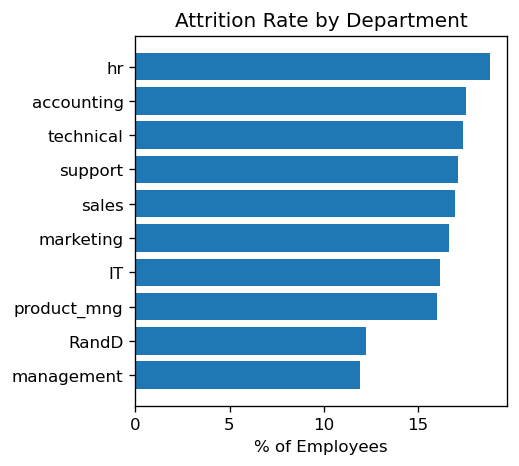

In [23]:
cols = ["department", "left"]
temp_df = df[cols].groupby("department").mean().sort_values("left") * 100

fig, ax = plt.subplots(figsize=(4, 4), dpi=120)
ax.barh(y=temp_df.index, width=temp_df["left"])
plt.xlabel("% of Employees")
plt.title("Attrition Rate by Department")
plt.show()

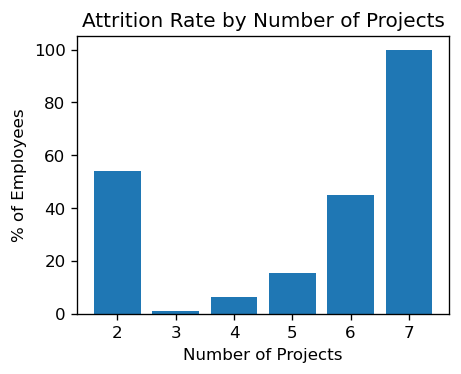

In [24]:
cols = ["number_project", "left"]
temp_df = df[cols].groupby("number_project").mean() * 100

fig, ax = plt.subplots(figsize=(4, 3), dpi=120)
ax.bar(x=temp_df.index, height=temp_df["left"])
plt.xlabel("Number of Projects")
plt.ylabel("% of Employees")
plt.title("Attrition Rate by Number of Projects")
plt.show()

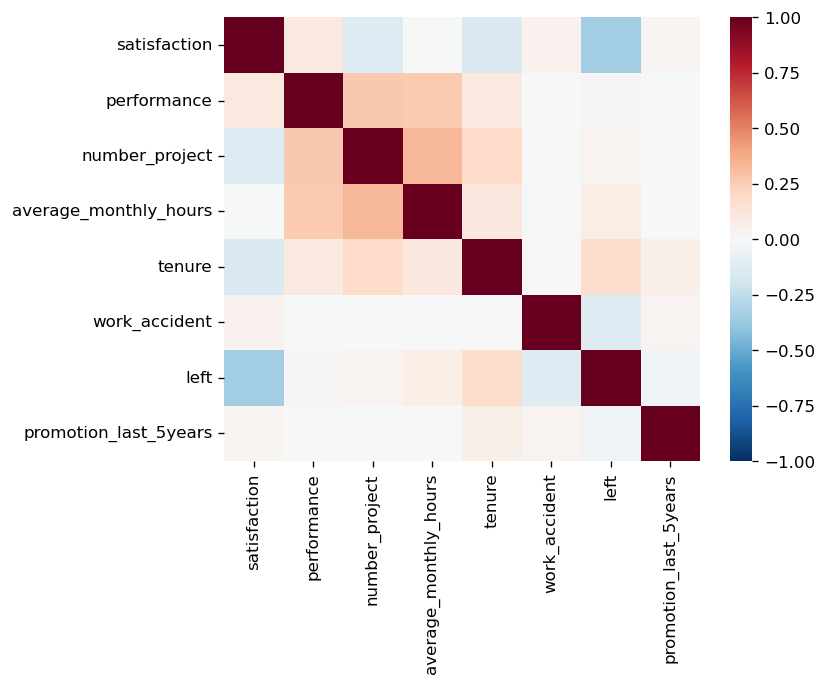

In [25]:
fig, ax = plt.subplots(dpi=120)
ax = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap=sns.color_palette("RdBu_r", as_cmap=True))
plt.show()

## Transformations

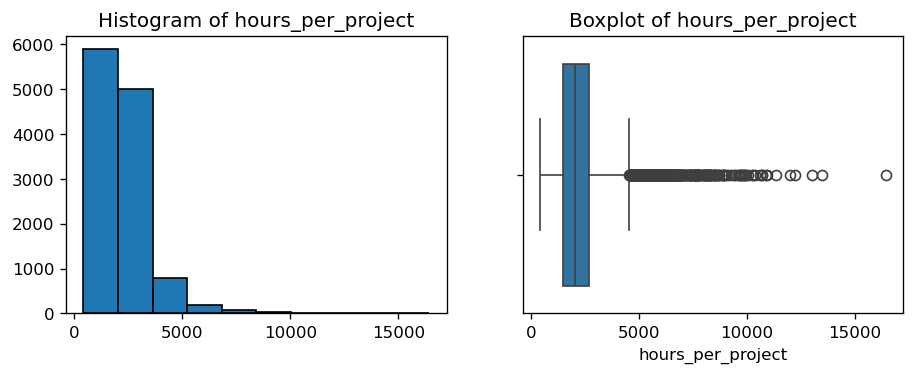

In [26]:
df["hours_per_project"] = 12 * df["average_monthly_hours"] * df["tenure"] / df["number_project"]

histo_boxplot("hours_per_project")

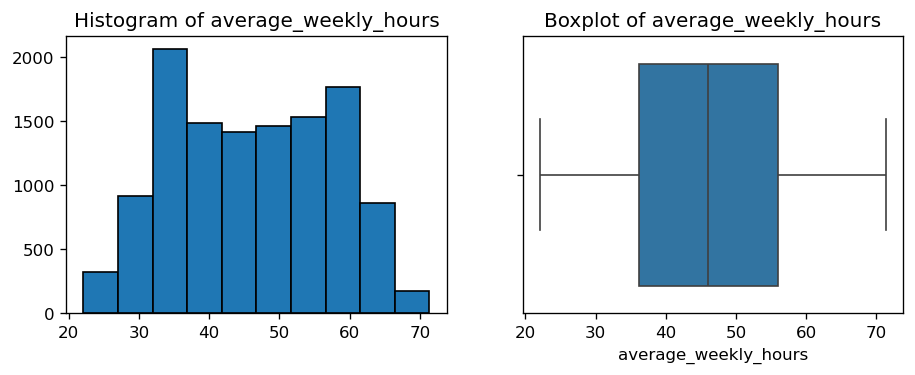

In [27]:
df["average_weekly_hours"] = df["average_monthly_hours"] * 12 * 7 / 365

histo_boxplot("average_weekly_hours")

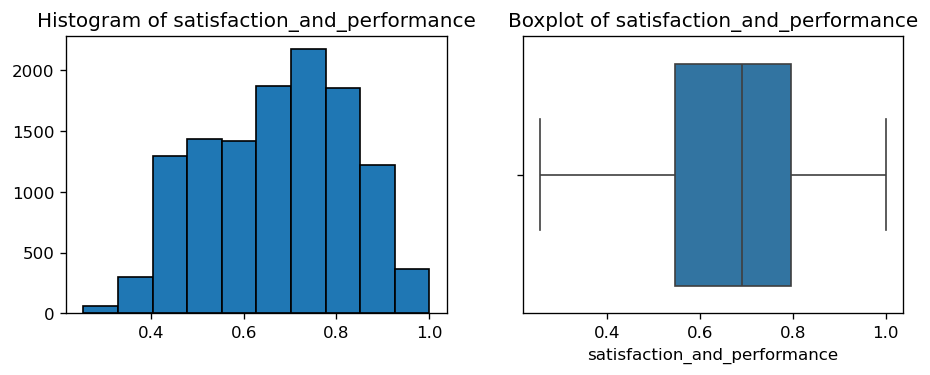

In [28]:
df["satisfaction_and_performance"] = (df["satisfaction"] + df["performance"]) / 2

histo_boxplot("satisfaction_and_performance")

## Hypothesis Tests

$H_{0}:$ The attrition rate of employees who were promoted in the last 5 years is equal to that of those who were not.
\
$H_{1}:$ The attrition rate of employees who were promoted in the last 5 years is not equal to that of those who were not.

In [29]:
temp_1 = df[df["promotion_last_5years"] == 0]["left"]
temp_2 = df[df["promotion_last_5years"] == 1]["left"]

print((np.mean(temp_1), np.mean(temp_2)))
print(stats.ttest_ind(temp_1, temp_2, equal_var=False, random_state=210))

(0.16822192059721752, 0.03940886699507389)
TtestResult(statistic=9.124990112611657, pvalue=3.869821150315928e-17, df=228.38579730975079)


$H_{0}:$ The attrition rate of employees who were involved in an accident at work is equal to that of those who were not.
\
$H_{1}:$ The attrition rate of employees who were involved in an accident at work is not equal to that of those who were not.

In [30]:
temp_1 = df[df["work_accident"] == 0]["left"]
temp_2 = df[df["work_accident"] == 1]["left"]

print((np.mean(temp_1), np.mean(temp_2)))
print(stats.ttest_ind(temp_1, temp_2, equal_var=False, random_state=210))

(0.18597771422936593, 0.05675675675675676)
TtestResult(statistic=19.50658907168565, pvalue=4.543510052540392e-81, df=4051.094568922909)


$H_{0}:$ The attrition rate is the same across all salary groups (low, medium, high).
\
$H_{1}:$ At least one salary group has a different attrition rate.

In [31]:
temp_1 = df[df["salary"] == "low"]["left"]
temp_2 = df[df["salary"] == "medium"]["left"]
temp_3 = df[df["salary"] == "high"]["left"]

print((np.mean(temp_1), np.mean(temp_2), np.mean(temp_3)))
print(stats.f_oneway(temp_1, temp_2, temp_3))

(0.20452961672473868, 0.14616992967116518, 0.048484848484848485)
F_onewayResult(statistic=88.88217510344577, pvalue=4.81240160160064e-39)
